In [8]:
import pandas as pd
import numpy as np
import mysql.connector
from mysql.connector import Error
from datetime import datetime
import env
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def run_query(sql_name):
    # Connect to the MySQL database (replace the placeholders with your actual credentials)
    host = env.db_host
    user = env.db_user
    password = env.db_password
    database = env.db_schema
    port = 33144

    # Create a connection to the database
    connection = mysql.connector.connect(host=host, user=user, password=password, database=database, port=port)

    # Create a cursor object to execute the SQL query
    cursor = connection.cursor()

    # Define the SQL query
    current_dir = f"./"
    file_path = f'{current_dir}{sql_name}'

    # Read the content of the file into a variable
    with open(file_path, 'r') as file:
        query = file.read()

    # Execute the query
    cursor.execute(query)

    # Fetch all the results into a list of tuples
    results = cursor.fetchall()

    # Get the column names from the cursor description
    columns = [col[0] for col in cursor.description]

    # Close the cursor and the connection
    cursor.close()
    connection.close()

    # Create a DataFrame from the results and column names
    df = pd.DataFrame(results, columns=columns)
    return df

In [10]:
# mager maka auto hapus yg korelasi tinggi
def remove_highly_correlated_features(df, threshold=0.9):
    """
    Menghapus fitur yang memiliki korelasi lebih dari ambang batas tertentu.
    
    Parameters:
    - df: DataFrame yang berisi fitur-fitur yang akan diperiksa.
    - threshold: Ambang batas korelasi.
    
    Returns:
    - DataFrame yang telah dikurangi fiturnya.
    """
    # Hanya mengambil kolom numerik untuk korelasi
    numeric_df = df.select_dtypes(include=[np.number])
    correlation_matrix = numeric_df.corr().abs()
    
    # Dapatkan matriks segitiga atas dari matriks korelasi
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    
    #print(f"kolom dengan korelasi di atas {threshold}: {upper_triangle.columns}")
    
    # Temukan indeks kolom fitur yang memiliki korelasi lebih dari ambang batas
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    
    return df.drop(columns=to_drop)

In [11]:
def manual_oversample(X, y):
    # Dapatkan indeks dari kelas minoritas
    minority_class_indices = y[y == 1].index
    majority_class_indices = y[y == 0].index
    
    # Hitung jumlah kelas mayoritas
    num_majority = len(y[y == 0])
    
    # Dapatkan sampel acak dari kelas minoritas
    random_minority_indices = np.random.choice(minority_class_indices, num_majority, replace=True)
    
    # Gabungkan indeks kelas mayoritas dengan sampel acak dari kelas minoritas
    over_sample_indices = np.concatenate([majority_class_indices, random_minority_indices])
    
    # Dapatkan data yang oversampled
    X_oversampled = X.loc[over_sample_indices]
    y_oversampled = y.loc[over_sample_indices]
    
    return X_oversampled, y_oversampled

In [12]:
# download dataset
download_df = run_query("queries/DATASET_BKI.sql")
print("downloading...")
# download_df.set_index(['reco_id_curr'], inplace=True)
print("generate csv...")
download_df.to_csv("dataset/DATASET_BKI.csv")

# download_df = run_query("queries/DATASET_INSTALLMENT_PAYMENT_MAX.sql")
# print("downloading...")
# download_df.set_index(['reco_id_curr'], inplace=True)
# print("generate csv...")
# download_df.to_csv("dataset/DATASET_INSTALLMENT_PAYMENT_MAX.csv")

# download_df = run_query("test_queries/PREDICTION_BKI_BALANCE.sql")
# print("downloading...")
# #download_df.set_index(['reco_id_curr'], inplace=True)
# print("generate csv...")
# download_df.to_csv("prediction/PREDICTION_BKI_BALANCE.csv")

downloading...
generate csv...


In [163]:
# credit appication
cred_app_df = pd.read_csv('dataset/DATASET_CREDIT_APPLICATION.csv')
cred_app_df = cred_app_df[['reco_id_curr',
 'contract_type_name',
 'gender',
 'own_car_flag',
 'own_realty_flag',
 'children_count',
 'income',
 'loan_body',
 'annuity_payment',
 'goods_price',
 'type_suite_name',
 'income_type_name',
 'education_type_name',
 'family_status_name',
 'housing_type_name',
 'population_relative_region',
 'days_birth',
 'days_employed',
 'registration_timestamp',
 'publication_timestamp',
 'age_own_car',
 'mobile_flag',
 'employee_phone_flag',
#  'work_phone_flag',
 'mobile_contact_flag',
 'phone_flag',
#  'email_flag',
 'type_of_occupation',
 'family_members__count',
 'rating_client_region',
 'rating_client_w_city_region',
#  'start_weekday_appr_process',
#  'hour_of_approval_process_start',
#  'not_live_region_reg_region',
#  'not_work_region_reg_region',
#  'living_region_not_work_region_flag',
#  'not_live_city_reg_city',
#  'not_work_city_reg_city',
#  'living_city_not_work_city_flag',
#  'type_of_organization',
 'external_source_1',
 'external_source_2',
 'external_source_3',
 'average_apartments',
 'average_basementarea',
 'average_years_beginexpluatation',
 'average_years_building',
 'average_commonarea',
 'average_elevator_count',
 'average_entrance_count',
 'average_max_floors',
 'average_min_floors',
 'average_land_area',
 'average_living_apartments',
 'average_living_area',
 'non_living_apartments_av',
 'non_living_area_avg',
 'mode_apartments',
 'mode_basementarea',
 'mode_years_beginexpluatation',
 'mode_years_building',
#  'mode_commonarea',
#  'mode_elevator_count',
#  'mode_entrance_count',
#  'mode_max_floors',
#  'mode_min_floors',
 'mode_land_area',
#  'mode_living_apartments',
#  'mode_living_area',
#  'non_living_apartments_mode',
#  'non_living_area_mode',
 'median_apartments',
 'median_basementarea',
 'median_years_beginexpluatation',
 'median_years_building',
 'median_commonarea',
 'median_elevator_count',
 'median_entrance_count',
 'median_max_floors',
 'median_min_floors',
 'median_land_area',
 'median_living_apartments',
 'median_living_area',
#  'non_living_apartments_medi',
#  'non_living_area_medi',
#  'fondkapremon_mode',
 'mode_house_type',
 'mode_total_area',
 'mode_walls_material',
 'emergency_state_mode',
 'observes_30_count_social_circle',
 'social_circle_defaults_30_days',
 'observes_60_count_social_circle',
 'social_circle_defaults_60_days',
 'last_phone_number_change',
 'document_2_flag',
 'document_3_flag',
#  'document_4_flag',
#  'document_5_flag',
#  'document_6_flag',
#  'document_7_flag',
#  'document_8_flag',
#  'document_9_flag',
#  'document_10_flag',
#  'document_11_flag',
#  'document_12_flag',
#  'document_13_flag',
#  'document_14_flag',
#  'document_15_flag',
#  'document_16_flag',
#  'document_17_flag',
#  'document_18_flag',
#  'document_19_flag',
#  'document_20_flag',
#  'document_21_flag',
#  'requests_bki_hour',
#  'requests_bki_day',
#  'requests_bki_week',
#  'requests_bki_month',
 'requests_bki_qrt',
 'requests_bki_year'
 ]].copy()

In [164]:
# credit appication
cred_app_df = pd.read_csv('dataset/DATASET_CREDIT_APPLICATION.csv')
cred_app_df = cred_app_df[[
 'reco_id_curr',
 'contract_type_name',
 'gender',
 'own_car_flag',
 'own_realty_flag',
 'children_count',
 'income',
 'loan_body',
 'annuity_payment',
 'goods_price',
 'type_suite_name',
 'income_type_name',
 'education_type_name',
 'family_status_name',
 'housing_type_name',
 'population_relative_region',
 'days_birth',
 'days_employed',
 'registration_timestamp',
 'publication_timestamp',
 'age_own_car',
 'mobile_flag',
 'employee_phone_flag',
 'work_phone_flag',
 'mobile_contact_flag',
 'phone_flag',
 'email_flag',
 'type_of_occupation',
 'family_members__count',
 'rating_client_region',
 'rating_client_w_city_region',
 'start_weekday_appr_process',
 'hour_of_approval_process_start',
 'not_live_region_reg_region',
 'not_work_region_reg_region',
 'living_region_not_work_region_flag',
 'not_live_city_reg_city',
 'not_work_city_reg_city',
 'living_city_not_work_city_flag',
 'type_of_organization',
 'external_source_1',
 'external_source_2',
 'external_source_3',
 'average_apartments',
 'average_basementarea',
 'average_years_beginexpluatation',
 'average_years_building',
 'average_commonarea',
 'average_elevator_count',
 'average_entrance_count',
 'average_max_floors',
 'average_min_floors',
 'average_land_area',
 'average_living_apartments',
 'average_living_area',
 'non_living_apartments_av',
 'non_living_area_avg',
 'mode_apartments',
 'mode_basementarea',
 'mode_years_beginexpluatation',
 'mode_years_building',
 'mode_commonarea',
 'mode_elevator_count',
 'mode_entrance_count',
 'mode_max_floors',
 'mode_min_floors',
 'mode_land_area',
 'mode_living_apartments',
 'mode_living_area',
 'non_living_apartments_mode',
 'non_living_area_mode',
 'median_apartments',
 'median_basementarea',
 'median_years_beginexpluatation',
 'median_years_building',
 'median_commonarea',
 'median_elevator_count',
 'median_entrance_count',
 'median_max_floors',
 'median_min_floors',
 'median_land_area',
 'median_living_apartments',
 'median_living_area',
 'non_living_apartments_medi',
 'non_living_area_medi',
 'mode_house_type',
 'mode_total_area',
 'mode_walls_material',
 'emergency_state_mode',
 'observes_30_count_social_circle',
 'social_circle_defaults_30_days',
 'observes_60_count_social_circle',
 'social_circle_defaults_60_days',
 'last_phone_number_change',
 'document_3_flag',
 'document_5_flag',
 'document_6_flag',
 'document_8_flag',
 'requests_bki_hour',
 'requests_bki_day',
 'requests_bki_week',
 'requests_bki_month',
 'requests_bki_qrt',
 'requests_bki_year'
 ]].copy()

In [165]:
# credit appication
# cred_app_df = pd.read_csv('dataset/DATASET_CREDIT_APPLICATION.csv')
target_df = pd.read_csv('dataset/DATASET_TARGET.csv')
# add TARGET
gabung_df = cred_app_df.merge(target_df, on='reco_id_curr', how='left')

# # add BKI
# bki_df = pd.read_csv('dataset/DATASET_BKI.csv')
# gabung_df = gabung_df.merge(bki_df, on='reco_id_curr', how='left')

# # add BKI BALANCE
# bki_balance_df = pd.read_csv('dataset/DATASET_BKI_BALANCE.csv')
# gabung_df = gabung_df.merge(bki_balance_df, on='reco_bureau_id', how='left')

# # add CASH BALANCE MIN
# cash_balance_min_df = pd.read_csv('dataset/DATASET_CASH_BALANCE_MIN.csv')
# gabung_df = gabung_df.merge(cash_balance_min_df, on='reco_id_curr', how='left')
# # add CASH BALANCE MAX
# cash_balance_max_df = pd.read_csv('dataset/DATASET_CASH_BALANCE_MAX.csv')
# gabung_df = gabung_df.merge(cash_balance_max_df, on='reco_id_curr', how='left')

# add CASH BALANCE AGG
# cash_balance_df = pd.read_csv('dataset/DATASET_CASH_BALANCE.csv')
# gabung_df = gabung_df.merge(cash_balance_df, on='reco_id_curr', how='left')

# # add CRED BALANCE MIN
# cred_balance_min_df = pd.read_csv('dataset/DATASET_CREDIT_BALANCE_MIN.csv')
# gabung_df = gabung_df.merge(cred_balance_min_df, on='reco_id_curr', how='left')
# # add CRED BALANCE MAX
# cred_balance_max_df = pd.read_csv('dataset/DATASET_CREDIT_BALANCE_MAX.csv')
# gabung_df = gabung_df.merge(cred_balance_max_df, on='reco_id_curr', how='left')

# # add INSTALLMENT PAYMENT MIN
# install_payment_min_df = pd.read_csv('dataset/DATASET_INSTALLMENT_PAYMENT_MIN.csv')
# gabung_df = gabung_df.merge(install_payment_min_df, on='reco_id_curr', how='left')
# # add INSTALLMENT PAYMENT MAX
# install_payment_max_df = pd.read_csv('dataset/DATASET_INSTALLMENT_PAYMENT_MAX.csv')
# gabung_df = gabung_df.merge(install_payment_max_df, on='reco_id_curr', how='left')
# # add INSTALLMENT PAYMENT AGG (to much missing data)
# install_payment_max_df = pd.read_csv('dataset/DATASET_INSTALLMENT_PAYMENT.csv')
# gabung_df = gabung_df.merge(install_payment_max_df, on='reco_id_curr', how='left')

# # add PREVIOUS_LOAN_AVG
# prev_load_df = pd.read_csv('dataset/DATASET_PREVIOUS_LOAN_AVG.csv')
# gabung_df = gabung_df.merge(prev_load_df, on='reco_id_curr', how='left')
prev_load_df = pd.read_csv('dataset/DATASET_PREVIOUS_LOAN.csv')
gabung_df = gabung_df.merge(prev_load_df, on='reco_id_curr', how='left')

gabung_df.set_index(['reco_id_curr'], inplace=True)

In [166]:
zero_columns = pd.read_csv('./dataset/zero_percentage_columns.csv')
len(zero_columns.Feature.tolist())

81

In [167]:
delete_columns_candidates = []
for col in zero_columns.Feature.tolist():
    if col in gabung_df.columns and col != 'target':
        delete_columns_candidates.append(col)
len(delete_columns_candidates)

71

In [168]:
gabung_df.drop(columns=delete_columns_candidates, inplace=True)
gabung_df.shape

(95964, 44)

In [169]:
# gabung_df = pd.read_csv('./dataset_df_cleaned_final.csv')

(95964, 44)


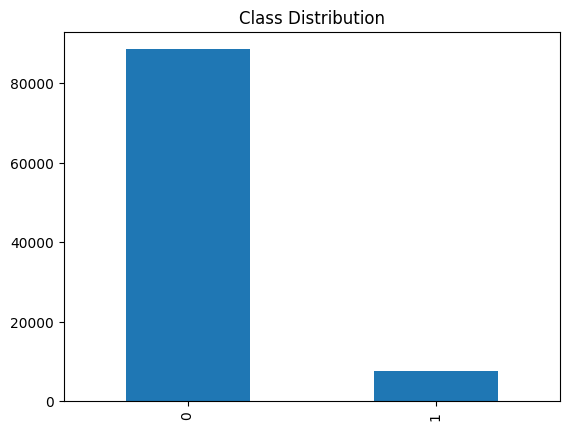

In [170]:
class_counts = gabung_df['target'].value_counts()
class_counts.plot(kind='bar', title='Class Distribution')
print(gabung_df.shape)

<Axes: title={'center': 'Strange Distribution of Days Employed > Days Birth'}, xlabel='days_employed', ylabel='days_birth'>

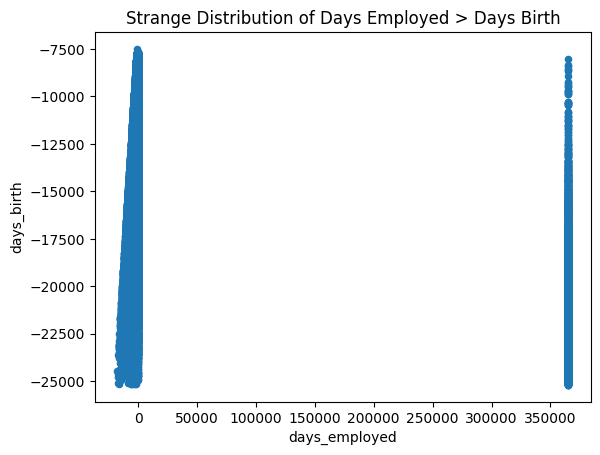

In [171]:
gabung_df.plot(kind='scatter', x='days_employed', y='days_birth', title='Strange Distribution of Days Employed > Days Birth')

In [172]:
# from sklearn.impute import KNNImputer

# # handling outlier
# gabung_df.loc[gabung_df['days_employed'] > 0, 'days_employed'] = np.nan

# # Inisialisasi KNNImputer
# knn_imputer = KNNImputer(n_neighbors=5)

# # Mengisi missing values untuk fitur numerik dengan KNNImputer
# df_numeric = gabung_df.select_dtypes(include=['int64'])
# gabung_df[df_numeric.columns] = knn_imputer.fit_transform(df_numeric)
# gabung_df.plot(kind='scatter', x='days_employed', y='days_birth')


# days_employed only
# from sklearn.impute import KNNImputer
# import numpy as np

# # handling outlier
# gabung_df.loc[gabung_df['days_employed'] > 0, 'days_employed'] = np.nan

# # Inisialisasi KNNImputer
# knn_imputer = KNNImputer(n_neighbors=5)

# # Mengisi missing values hanya untuk kolom 'income' dengan KNNImputer
# income_imputed = knn_imputer.fit_transform(gabung_df[['days_employed']])
# gabung_df['days_employed'] = income_imputed

# gabung_df.plot(kind='scatter', x='days_employed', y='days_birth')

In [173]:
gabung_df.drop(gabung_df.filter(regex='Unnamed').columns, axis=1, inplace=True)
gabung_df.drop(gabung_df.filter(regex='reco_bureau_id').columns, axis=1, inplace=True)
gabung_df.drop(gabung_df.filter(regex='reco_id_last').columns, axis=1, inplace=True)
gabung_df.drop(gabung_df[gabung_df['gender'] == 'XNA'].index, inplace=True)
gabung_df.shape

(95963, 43)

In [174]:
with open('dataset_na_columns.csv', 'w') as f:
    f.write(f'column, na_count\n')
    for col in gabung_df.columns:
        f.write(f"{col}, {gabung_df[col].isna().sum()}\n")
    f.close()

In [175]:
# Mengatur nilai days_employed yang tidak konsisten menjadi NaN
gabung_df.loc[gabung_df['days_employed'] > -gabung_df['days_birth'], 'days_employed'] = np.nan

# Melakukan imputasi dengan median untuk days_employed
median_value = gabung_df['days_employed'].median()
gabung_df['days_employed'].fillna(median_value, inplace=True)

# gabung_df.drop(gabung_df[gabung_df['days_employed'] > 0].index, inplace=True)
gabung_df.drop(columns=['days_employed'], inplace=True)


gabung_df.drop(gabung_df[gabung_df['income'] >= 700000].index, inplace=True)
# gabung_df.drop(columns=['income'], inplace=True)

gabung_df.drop(gabung_df[gabung_df['requests_bki_year'] > 10].index, inplace=True)
gabung_df.drop(gabung_df[gabung_df['children_count'] > 11].index, inplace=True)

# drop BKI
# gabung_df.drop(columns=['days_credit', 'days_credit_enddate', 'days_credit_update'], inplace=True)

# drop from BKI BALANCE
# gabung_df.drop(columns=['MIN(months_balance)'], inplace=True)
# gabung_df.drop(columns=['stat_for_bureau'], inplace=True)

reduced_df = remove_highly_correlated_features(gabung_df)
print(gabung_df.shape)
print(reduced_df.shape)

(95749, 42)
(95749, 35)


<Axes: xlabel='children_count', ylabel='requests_bki_year'>

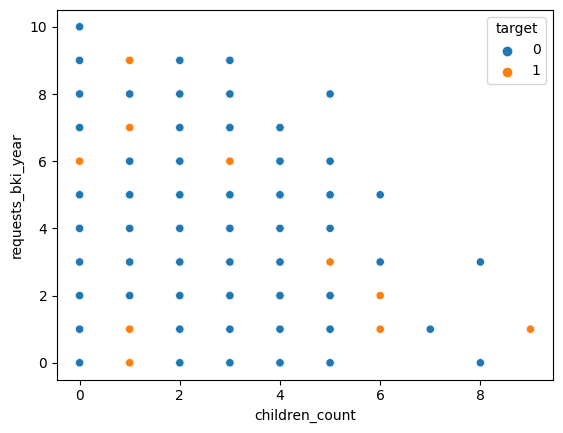

In [176]:
sns.scatterplot(x='children_count', y='requests_bki_year', hue='target', data=gabung_df)

In [177]:
# gabung_df.drop(gabung_df[gabung_df['income'] >= 1000000].index, inplace=True)
# sns.scatterplot(x='children_count', y='income', hue='target', data=gabung_df)

### training with manual_oversample

In [178]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib
from sklearn.impute import KNNImputer

# pilihan df   
df = gabung_df.copy()

# Mengisi missing values numerik
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Mengisi missing values untuk fitur kategorikal dengan modus
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Label Encoding kolom kategorikal
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split Train vs Test Data
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_train_resampled, y_train_resampled = manual_oversample(X_train_df, y_train)

### LightGBM Default

In [179]:
# Pelatihan model LightGBM
import lightgbm as lgb

# Pelatihan model LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_resampled, y_train_resampled)

# Prediksi
y_pred_lgb = lgb_model.predict(X_test_scaled)
y_pred_prob_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_pred_prob_lgb)
report_lgb = classification_report(y_test, y_pred_lgb)

print(f"\nLightGBM Results:")
print(f"Accuracy Score: {accuracy_lgb:.4f}")
print("Classification Report:\n", report_lgb)
print(f"ROC AUC Score: {roc_auc_lgb:.4f}")
joblib.dump(lgb_model, 'LightGBM_model.pkl')

[LightGBM] [Info] Number of positive: 70604, number of negative: 70604
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4797
[LightGBM] [Info] Number of data points in the train set: 141208, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM Results:
Accuracy Score: 0.7366
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84     17631
           1       0.18      0.63      0.27      1519

    accuracy                           0.74     19150
   macro avg       0.57      0.69      0.56     19150
weighted avg       0.90      0.74      0.79     19150

ROC AUC Score: 0.7423


['LightGBM_model.pkl']

In [28]:
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import RFE
# import joblib
# from sklearn.ensemble import RandomForestClassifier  # Ganti dengan model yang sesuai

# # pilihan df   
# df = gabung_df.copy()

# # Mengisi missing values numerik
# for col in df.select_dtypes(include=['int64', 'float64']).columns:
#     df[col].fillna(df[col].median(), inplace=True)

# # Mengisi missing values untuk fitur kategorikal dengan modus
# for col in df.select_dtypes(include=['object']).columns:
#     df[col].fillna(df[col].mode()[0], inplace=True)

# # Label Encoding kolom kategorikal
# label_encoders = {}
# for col in df.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # Split Train vs Test Data
# X = df.drop("target", axis=1)
# y = df["target"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Penskalaan fitur
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Resample
# X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_train_df.reset_index(drop=True, inplace=True)
# y_train.reset_index(drop=True, inplace=True)
# X_train_resampled, y_train_resampled = manual_oversample(X_train_df, y_train)

# # Inisialisasi model RandomForestClassifier (contoh)
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# # Inisialisasi RFE
# rfe = RFE(estimator=rf_model, n_features_to_select=10, step=1)

# # Fit RFE ke data
# rfe = rfe.fit(X_train_resampled, y_train_resampled)

# # Fitur-fitur terpilih
# selected_features = X_train.columns[rfe.support_]
# print("Selected Features:")
# print(selected_features)

# # Gunakan hanya fitur-fitur terpilih
# X_train_resampled_selected = X_train_resampled[selected_features]
# X_test_selected = X_test[selected_features]


### LightGBM class_weight='balanced'

In [133]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import joblib

# pilihan df
df = gabung_df.copy()

# Mengisi missing values numerik
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Mengisi missing values untuk fitur kategorikal dengan modus
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Label Encoding kolom kategorikal
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split Train vs Test Data
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Pelatihan model LightGBM
lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
lgb_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_lgb = lgb_model.predict(X_test_scaled)
y_pred_prob_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_pred_prob_lgb)
report_lgb = classification_report(y_test, y_pred_lgb)

print(f"\nLightGBM Results:")
print(f"Accuracy Score: {accuracy_lgb:.4f}")
print("Classification Report:\n", report_lgb)
print(f"ROC AUC Score: {roc_auc_lgb:.4f}")
joblib.dump(lgb_model, 'LightGBM_model_balanced.pkl')

[LightGBM] [Info] Number of positive: 5995, number of negative: 70604
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4817
[LightGBM] [Info] Number of data points in the train set: 76599, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

LightGBM Results:
Accuracy Score: 0.7320
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.74      0.84     17631
           1       0.17      0.63      0.27      1519

    accuracy                           0.73     19150
   macro avg       0.57      0.68      0.55     19150
weighted avg       0.90      0.73      0.79     19150

ROC AUC Score: 0.7426


['LightGBM_model_balanced.pkl']

### LightGBM with SMOTE

In [134]:
from imblearn.over_sampling import SMOTE

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Pelatihan model LightGBM
lgb_model_smote = lgb.LGBMClassifier(random_state=42)
lgb_model_smote.fit(X_train_resampled, y_train_resampled)

# Prediksi
y_pred_lgb_smote = lgb_model_smote.predict(X_test_scaled)
y_pred_prob_lgb_smote = lgb_model_smote.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy_lgb_smote = accuracy_score(y_test, y_pred_lgb_smote)
roc_auc_lgb_smote = roc_auc_score(y_test, y_pred_prob_lgb_smote)
report_lgb_smote = classification_report(y_test, y_pred_lgb_smote)

print(f"\nLightGBM with SMOTE Results:")
print(f"Accuracy Score: {accuracy_lgb_smote:.4f}")
print("Classification Report:\n", report_lgb_smote)
print(f"ROC AUC Score: {roc_auc_lgb_smote:.4f}")

# Menyimpan model, scaler, dan encoders
joblib.dump(lgb_model_smote, 'LightGBM_model_smote.pkl')
joblib.dump(scaler, 'data_scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

[LightGBM] [Info] Number of positive: 70604, number of negative: 70604
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007730 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9768
[LightGBM] [Info] Number of data points in the train set: 141208, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM with SMOTE Results:
Accuracy Score: 0.9206
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     17631
           1       0.49      0.03      0.06      1519

    accuracy                           0.92     19150
   macro avg       0.71      0.51      0.51     19150
weighted avg       0.89      0.92      0.89     19150

ROC AUC Score: 0.7377


['label_encoders.pkl']

### LightGBM with SMOTE + Tomek Results

In [135]:
from imblearn.combine import SMOTETomek

# Menggunakan SMOTE dengan Tomek links
smt = SMOTETomek(random_state=42)
X_train_resampled_tomek, y_train_resampled_tomek = smt.fit_resample(X_train_scaled, y_train)

# Pelatihan model LightGBM
lgb_model_smt = lgb.LGBMClassifier(random_state=42)
lgb_model_smt.fit(X_train_resampled_tomek, y_train_resampled_tomek)

# Prediksi
y_pred_lgb_smt = lgb_model_smt.predict(X_test_scaled)
y_pred_prob_lgb_smt = lgb_model_smt.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy_lgb_smt = accuracy_score(y_test, y_pred_lgb_smt)
roc_auc_lgb_smt = roc_auc_score(y_test, y_pred_prob_lgb_smt)
report_lgb_smt = classification_report(y_test, y_pred_lgb_smt)

print(f"\nLightGBM with SMOTE + Tomek Results:")
print(f"Accuracy Score: {accuracy_lgb_smt:.4f}")
print("Classification Report:\n", report_lgb_smt)
print(f"ROC AUC Score: {roc_auc_lgb_smt:.4f}")


[LightGBM] [Info] Number of positive: 70601, number of negative: 70601
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9768
[LightGBM] [Info] Number of data points in the train set: 141202, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM with SMOTE + Tomek Results:
Accuracy Score: 0.9203
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     17631
           1       0.46      0.03      0.06      1519

    accuracy                           0.92     19150
   macro avg       0.69      0.51      0.51     19150
weighted avg       0.89      0.92      0.89     19150

ROC AUC Score: 0.7368


### Logistic Regression

In [136]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

# Prediksi dengan kelas
y_pred = lr.predict(X_test_scaled)

# Prediksi dengan probabilitas
y_pred_prob = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
report = classification_report(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.4f}")
print("Classification Report:\n", report)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Menyimpan model, scaler, dan encoders
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'data_scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

Accuracy Score: 0.6895
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     17631
           1       0.16      0.66      0.25      1519

    accuracy                           0.69     19150
   macro avg       0.56      0.68      0.53     19150
weighted avg       0.90      0.69      0.76     19150

ROC AUC Score: 0.7326


['label_encoders.pkl']

In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Asumsikan Anda memiliki dataframe `df` yang siap untuk diproses
df = gabung_df.copy()

# Mengisi missing values numerik
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Mengisi missing values untuk fitur kategorikal dengan modus
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Label Encoding kolom kategorikal
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data menjadi training dan validation
X_full = df.drop("target", axis=1)
y_full = df["target"]
X_train_full, X_val, y_train_full, y_val = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_val_scaled = scaler.transform(X_val)

# Inisialisasi Logistic Regression dengan bobot seimbang
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Training model
lr.fit(X_train_scaled, y_train_full)

# Evaluasi performa pada validation set
y_val_pred = lr.predict_proba(X_val_scaled)[:,1]
roc_auc = roc_auc_score(y_val, y_val_pred)
print("ROC AUC on Validation set:", roc_auc)

ROC AUC on Validation set: 0.7355204559388017


In [121]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [122]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

In [138]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membangun model dengan TensorFlow
n_features = X_train_scaled.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_features,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluasi Model
y_pred = model.predict(X_test_scaled)
roc_score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_score:.4f}")

Epoch 1/10
1915/1915 [==============================] - 2s 884us/step - loss: 0.2591 - accuracy: 0.9213 - val_loss: 0.2568 - val_accuracy: 0.9207
Epoch 2/10
1915/1915 [==============================] - 2s 839us/step - loss: 0.2501 - accuracy: 0.9220 - val_loss: 0.2548 - val_accuracy: 0.9207
Epoch 3/10
1915/1915 [==============================] - 2s 841us/step - loss: 0.2484 - accuracy: 0.9220 - val_loss: 0.2538 - val_accuracy: 0.9207
Epoch 4/10
1915/1915 [==============================] - 2s 850us/step - loss: 0.2473 - accuracy: 0.9219 - val_loss: 0.2554 - val_accuracy: 0.9207
Epoch 5/10
1915/1915 [==============================] - 2s 851us/step - loss: 0.2467 - accuracy: 0.9221 - val_loss: 0.2529 - val_accuracy: 0.9207
Epoch 6/10
1915/1915 [==============================] - 2s 870us/step - loss: 0.2448 - accuracy: 0.9221 - val_loss: 0.2523 - val_accuracy: 0.9208
Epoch 7/10
1915/1915 [==============================] - 2s 849us/step - loss: 0.2443 - accuracy: 0.9223 - val_loss: 0.2510 -

Default GPU Device: /device:GPU:0
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 256)               51968     
                                                                 
 batch_normalization_23 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_26 (Dropout)        (None, 256)               0         
                                                                 
 reshape_4 (Reshape)         (None, 256, 1)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 254, 128)          512       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 127, 128)         0         
 1D)               

Epoch 21/100
600/600 [==============================] - 1s 1ms/step loss:

ROC-AUC - epoch: 21 - score: 0.694379
4422/4422 [==============================] - 29s 7ms/step - loss: 0.3721 - accuracy: 0.8351 - val_loss: 0.3737 - val_accuracy: 0.8456 - lr: 2.0000e-04
Epoch 22/100
600/600 [==============================] - 1s 1ms/step loss:

ROC-AUC - epoch: 22 - score: 0.696490
4422/4422 [==============================] - 30s 7ms/step - loss: 0.3667 - accuracy: 0.8372 - val_loss: 0.3691 - val_accuracy: 0.8498 - lr: 2.0000e-04
Epoch 23/100
600/600 [==============================] - 1s 1ms/step loss:

ROC-AUC - epoch: 23 - score: 0.704925
4422/4422 [==============================] - 29s 7ms/step - loss: 0.3636 - accuracy: 0.8392 - val_loss: 0.3798 - val_accuracy: 0.8475 - lr: 2.0000e-04


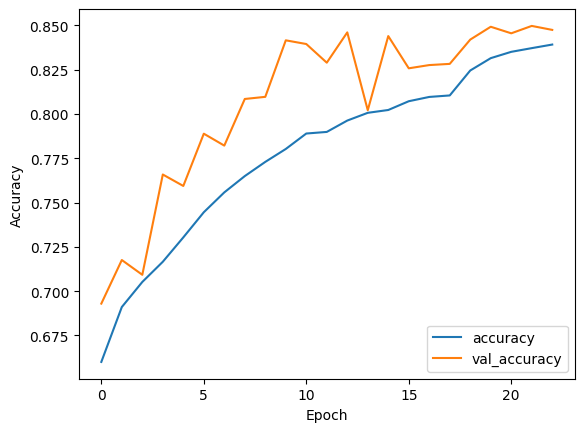

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, save_model
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv1D, MaxPooling1D, Reshape
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from sklearn.metrics import roc_auc_score
import tensorflow as tf

# Memastikan TensorFlow menggunakan GPU
if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

class ROCAUCCallback(Callback):
    def __init__(self, validation_data):
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_epoch_end(self, epoch, logs={}):
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        print('\nROC-AUC - epoch: %d - score: %.6f' % (epoch+1, roc_val))

def create_model(input_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=input_dim, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Convolutional layers
    model.add(Reshape((256, 1)))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = create_model(X_train_resampled.shape[1])
print(model.summary())

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
roc_callback = ROCAUCCallback(validation_data=(X_test_scaled, y_test))
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_test_scaled, y_test),
                    epochs=100, batch_size=32, callbacks=[early_stopping, roc_callback, reduce_lr])

# Plot ROC-AUC
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Save model
model.save("optimal_model.h5")


In [139]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Prediksi dengan kelas
y_pred_rf = rf.predict(X_test_scaled)

# Prediksi dengan probabilitas
y_pred_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"\nRandom Forest Results:")
print(f"Accuracy Score: {accuracy_rf:.4f}")
print("Classification Report:\n", report_rf)
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

# Menyimpan model RandomForest
joblib.dump(rf, 'random_forest_model.pkl')


Random Forest Results:
Accuracy Score: 0.9111
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     17631
           1       0.26      0.07      0.10      1519

    accuracy                           0.91     19150
   macro avg       0.59      0.52      0.53     19150
weighted avg       0.87      0.91      0.89     19150

ROC AUC Score: 0.7006


['random_forest_model.pkl']

In [140]:
# Pelatihan model XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"\nXGBoost Results:")
print(f"Accuracy Score: {accuracy_xgb:.4f}")
print("Classification Report:\n", report_xgb)
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")

# Menyimpan model RandomForest
joblib.dump(rf, 'xgboost_model.pkl')


XGBoost Results:
Accuracy Score: 0.9182
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     17631
           1       0.38      0.05      0.09      1519

    accuracy                           0.92     19150
   macro avg       0.65      0.52      0.52     19150
weighted avg       0.88      0.92      0.89     19150

ROC AUC Score: 0.7221


['xgboost_model.pkl']

## Prediction Data

#### download data to predict

In [269]:
# download prediction data
# queries = ['PREDICTION_BKI','PREDICTION_CASH_BALANCE', 'PREDICTION_CREDIT_APPLICATION', 
# 'PREDICTION_INSTALLMENT_PAYMENT', 'PREDICTION_PREVIOUS_LOAN']

# download prediction data
queries = ['PREDICTION_BKI']

for quer in queries:
    download_df = run_query(f"test_queries/{quer}.sql")
    print(f"data rows {quer}: {len(download_df)}")
    # for idx in indexes:
    #     if idx in download_df.columns:
    #         download_df.set_index([idx], inplace=True)
    download_df.to_csv(f"prediction/{quer}.csv")
    print(f"{quer} csv generated!\n")

data rows PREDICTION_BKI: 338866
PREDICTION_BKI csv generated!



In [187]:
# credit appication
cred_app_df = pd.read_csv('prediction/PREDICTION_CREDIT_APPLICATION.csv')
cred_app_df = cred_app_df[[
 'reco_id_curr',
 'contract_type_name',
 'gender',
 'own_car_flag',
 'own_realty_flag',
 'children_count',
 'income',
 'loan_body',
 'annuity_payment',
 'goods_price',
 'type_suite_name',
 'income_type_name',
 'education_type_name',
 'family_status_name',
 'housing_type_name',
 'population_relative_region',
 'days_birth',
 'days_employed',
 'registration_timestamp',
 'publication_timestamp',
 'age_own_car',
 'mobile_flag',
 'employee_phone_flag',
 'work_phone_flag',
 'mobile_contact_flag',
 'phone_flag',
 'email_flag',
 'type_of_occupation',
 'family_members__count',
 'rating_client_region',
 'rating_client_w_city_region',
 'start_weekday_appr_process',
 'hour_of_approval_process_start',
 'not_live_region_reg_region',
 'not_work_region_reg_region',
 'living_region_not_work_region_flag',
 'not_live_city_reg_city',
 'not_work_city_reg_city',
 'living_city_not_work_city_flag',
 'type_of_organization',
 'external_source_1',
 'external_source_2',
 'external_source_3',
 'average_apartments',
 'average_basementarea',
 'average_years_beginexpluatation',
 'average_years_building',
 'average_commonarea',
 'average_elevator_count',
 'average_entrance_count',
 'average_max_floors',
 'average_min_floors',
 'average_land_area',
 'average_living_apartments',
 'average_living_area',
 'non_living_apartments_av',
 'non_living_area_avg',
 'mode_apartments',
 'mode_basementarea',
 'mode_years_beginexpluatation',
 'mode_years_building',
 'mode_commonarea',
 'mode_elevator_count',
 'mode_entrance_count',
 'mode_max_floors',
 'mode_min_floors',
 'mode_land_area',
 'mode_living_apartments',
 'mode_living_area',
 'non_living_apartments_mode',
 'non_living_area_mode',
 'median_apartments',
 'median_basementarea',
 'median_years_beginexpluatation',
 'median_years_building',
 'median_commonarea',
 'median_elevator_count',
 'median_entrance_count',
 'median_max_floors',
 'median_min_floors',
 'median_land_area',
 'median_living_apartments',
 'median_living_area',
 'non_living_apartments_medi',
 'non_living_area_medi',
 'mode_house_type',
 'mode_total_area',
 'mode_walls_material',
 'emergency_state_mode',
 'observes_30_count_social_circle',
 'social_circle_defaults_30_days',
 'observes_60_count_social_circle',
 'social_circle_defaults_60_days',
 'last_phone_number_change',
 'document_3_flag',
 'document_5_flag',
 'document_6_flag',
 'document_8_flag',
 'requests_bki_hour',
 'requests_bki_day',
 'requests_bki_week',
 'requests_bki_month',
 'requests_bki_qrt',
 'requests_bki_year'
 ]].copy()

In [188]:
# credit appication
# cred_app_df = pd.read_csv('dataset/DATASET_CREDIT_APPLICATION.csv')
# target_df = pd.read_csv('dataset/DATASET_TARGET.csv')
# add TARGET
# gabung_df = cred_app_df.merge(target_df, on='reco_id_curr', how='left')

# # add BKI
# bki_df = pd.read_csv('prediction/PREDICTION_BKI.csv')
# pred_gabung_df = cred_app_df.merge(bki_df, on='reco_id_curr', how='left')

# # add BKI BALANCE
# bki_balance_df = pd.read_csv('dataset/DATASET_BKI_BALANCE.csv')
# gabung_df = gabung_df.merge(bki_balance_df, on='reco_bureau_id', how='left')

# # add CASH BALANCE MIN
# cash_balance_min_df = pd.read_csv('dataset/DATASET_CASH_BALANCE_MIN.csv')
# gabung_df = gabung_df.merge(cash_balance_min_df, on='reco_id_curr', how='left')
# # add CASH BALANCE MAX
# cash_balance_max_df = pd.read_csv('dataset/DATASET_CASH_BALANCE_MAX.csv')
# gabung_df = gabung_df.merge(cash_balance_max_df, on='reco_id_curr', how='left')
# add CASH BALANCE AGG
# cash_balance_df = pd.read_csv('prediction/PREDICTION_CASH_BALANCE.csv')
# pred_gabung_df = pred_gabung_df.merge(cash_balance_df, on='reco_id_curr', how='left')

# # add CRED BALANCE MIN
# cred_balance_min_df = pd.read_csv('dataset/DATASET_CREDIT_BALANCE_MIN.csv')
# gabung_df = gabung_df.merge(cred_balance_min_df, on='reco_id_curr', how='left')
# # add CRED BALANCE MAX
# cred_balance_max_df = pd.read_csv('dataset/DATASET_CREDIT_BALANCE_MAX.csv')
# gabung_df = gabung_df.merge(cred_balance_max_df, on='reco_id_curr', how='left')

# # add INSTALLMENT PAYMENT MIN
# install_payment_min_df = pd.read_csv('dataset/DATASET_INSTALLMENT_PAYMENT_MIN.csv')
# gabung_df = gabung_df.merge(install_payment_min_df, on='reco_id_curr', how='left')
# # add INSTALLMENT PAYMENT MAX
# install_payment_max_df = pd.read_csv('dataset/DATASET_INSTALLMENT_PAYMENT_MAX.csv')
# gabung_df = gabung_df.merge(install_payment_max_df, on='reco_id_curr', how='left')
# # add INSTALLMENT PAYMENT AGG (to much missing data)
# install_payment_max_df = pd.read_csv('dataset/DATASET_INSTALLMENT_PAYMENT.csv')
# gabung_df = gabung_df.merge(install_payment_max_df, on='reco_id_curr', how='left')

# # add PREVIOUS_LOAN_AVG
# prev_load_df = pd.read_csv('dataset/DATASET_PREVIOUS_LOAN_AVG.csv')
# gabung_df = gabung_df.merge(prev_load_df, on='reco_id_curr', how='left')
# prev_load_df = pd.read_csv('prediction/PREDICTION_PREVIOUS_LOAN.csv')
# pred_gabung_df = pred_gabung_df.merge(prev_load_df, on='reco_id_curr', how='left')
prev_load_df = pd.read_csv('prediction/PREDICTION_PREVIOUS_LOAN.csv')
pred_gabung_df = cred_app_df.merge(prev_load_df, on='reco_id_curr', how='left')


print(pred_gabung_df.shape)
pred_gabung_df.head()

(1000, 115)


,reco_id_curr,contract_type_name,gender,own_car_flag,own_realty_flag,children_count,income,loan_body,annuity_payment,goods_price,...,annuity_payment_mean,annuity_payment_sum,loan_body_requested_mean,loan_body_requested_sum,loan_body_mean,loan_body_sum,first_payment_mean,first_payment_sum,goods_price_mean,goods_price_sum
0,38027ebd59e7c2614201a9ad29d91f33,Cash loans,F,N,Y,1,121500.0,284400.0,16011.0,225000.0,...,27724.618430,304970.802734,328737.272727,3.616110e+06,439365.681818,4833022.5,4090.909091,45000.000000,328737.272727,3.616110e+06
1,f7825cc89df0a3665baddede33a196f0,Revolving loans,F,N,Y,0,67500.0,202500.0,10125.0,202500.0,...,3352.185059,3352.185059,33079.500000,3.307950e+04,37008.000000,37008.0,0.000000,0.000000,33079.500000,3.307950e+04
2,73ed7df79781a75b16431fc4c9dd50e9,Cash loans,F,N,Y,1,135000.0,1078200.0,31653.0,900000.0,...,8774.112898,122837.580566,89301.278460,1.250218e+06,98747.678571,1382467.5,2725.778599,38160.900391,89301.278460,1.250218e+06
3,bec10049923a0bb209a2044d06a96e86,Cash loans,F,Y,Y,0,112500.0,508496.0,21672.0,454500.0,...,22749.524902,45499.049805,197385.750000,3.947715e+05,211450.500000,422901.0,0.000000,0.000000,197385.750000,3.947715e+05
4,8095e640b1088676e43264eb470b4806,Cash loans,M,Y,N,1,270000.0,1676520.0,46233.0,1498500.0,...,29697.940674,118791.762695,529875.000000,2.119500e+06,584473.500000,2337894.0,0.000000,0.000000,529875.000000,2.119500e+06


In [189]:
delete_columns_candidates = []
for col in zero_columns.Feature.tolist():
    if col in pred_gabung_df.columns and col != 'target':
        delete_columns_candidates.append(col)
len(delete_columns_candidates)

71

In [190]:
pred_gabung_df.drop(columns=delete_columns_candidates, inplace=True)

In [191]:
with open('prediction_na_columns.csv', 'w') as f:
    f.write(f'column, na_count\n')
    for col in pred_gabung_df.columns:
        f.write(f"{col}, {pred_gabung_df[col].isna().sum()}\n")
    f.close()

<Axes: title={'center': 'Strange Distribution of Days Employed > Days Birth'}, xlabel='days_employed', ylabel='days_birth'>

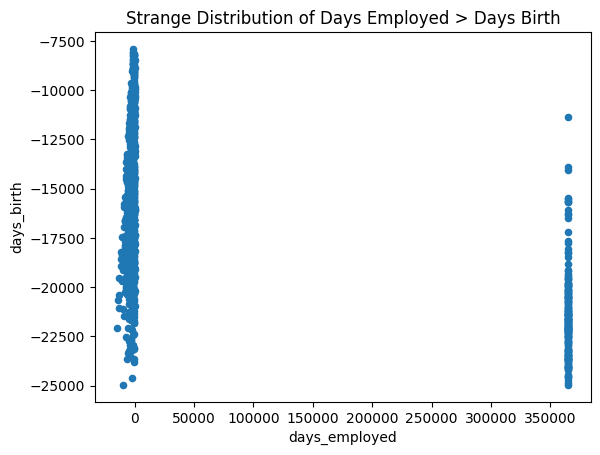

In [192]:
pred_gabung_df.plot(kind='scatter', x='days_employed', y='days_birth', title='Strange Distribution of Days Employed > Days Birth')

In [193]:
pred_gabung_df.drop(pred_gabung_df.filter(regex='Unnamed').columns, axis=1, inplace=True)
pred_gabung_df.drop(pred_gabung_df.filter(regex='reco_bureau_id').columns, axis=1, inplace=True)
pred_gabung_df.drop(pred_gabung_df.filter(regex='reco_id_last').columns, axis=1, inplace=True)
pred_gabung_df.drop(pred_gabung_df[pred_gabung_df['gender'] == 'XNA'].index, inplace=True)

# # Mengatur nilai days_employed yang tidak konsisten menjadi NaN
# pred_gabung_df.loc[pred_gabung_df['days_employed'] > -pred_gabung_df['days_birth'], 'days_employed'] = np.nan

# # Melakukan imputasi dengan median untuk days_employed
# median_value = pred_gabung_df['days_employed'].median()
# pred_gabung_df['days_employed'].fillna(median_value, inplace=True)

# gabung_df.drop(gabung_df[gabung_df['days_employed'] > 0].index, inplace=True)
pred_gabung_df.drop(columns=['days_employed'], inplace=True)

# pred_gabung_df.drop(pred_gabung_df[pred_gabung_df['income'] >= 700000].index, inplace=True)

# gabung_df.drop(columns=['income'], inplace=True)

# pred_gabung_df.drop(pred_gabung_df[pred_gabung_df['requests_bki_year'] > 10].index, inplace=True)
pred_gabung_df.drop(pred_gabung_df[pred_gabung_df['children_count'] > 11].index, inplace=True)

# drop BKI
# gabung_df.drop(columns=['days_credit', 'days_credit_enddate', 'days_credit_update'], inplace=True)

# drop from BKI BALANCE
# gabung_df.drop(columns=['MIN(months_balance)'], inplace=True)
# gabung_df.drop(columns=['stat_for_bureau'], inplace=True)

reduced_df = remove_highly_correlated_features(pred_gabung_df)
print(pred_gabung_df.shape)
print(reduced_df.shape)

(1000, 42)
(1000, 35)


In [194]:
for col in pred_gabung_df.columns:
    if col not in gabung_df.columns:
        print(col)

reco_id_curr


In [195]:
reco_id_curr = pred_gabung_df['reco_id_curr'].copy()
pred_gabung_df.reset_index()
# pred_gabung_df.drop(columns=['reco_bureau_id'], inplace=True)
pred_gabung_df.set_index(['reco_id_curr'], inplace=True)
print(pred_gabung_df.shape)

(1000, 41)


In [196]:
import pandas as pd
import joblib
import numpy as np

# Ambil data baru
df_predict = pred_gabung_df

# Load label encoders and scaler first
label_encoders = joblib.load('label_encoders.pkl')
scaler = joblib.load('data_scaler.pkl')

# Mengisi missing values
for col in df_predict.select_dtypes(include=['float64', 'int64']).columns:
    df_predict[col].fillna(df_predict[col].median(), inplace=True)
for col in df_predict.select_dtypes(include=['object']).columns:
    df_predict[col].fillna(df_predict[col].mode()[0], inplace=True)

# Misalkan Anda memiliki list dari semua kolom kategorikal
categorical_cols = df_predict.select_dtypes(include=['object']).columns

cols_to_drop = []  # List untuk menyimpan kolom yang harus dihapus

for col in categorical_cols:
    try:
        # print(f"Processing column: {col}")
        
        # Cari label yang belum pernah dilihat
        unseen_labels = set(df_predict[col]) - set(label_encoders[col].classes_)
        
        # Gantikan label yang belum pernah dilihat dengan NaN atau 'lainnya'
        temp_df = df_predict[col].replace(unseen_labels, np.nan)  # atau gantikan np.nan dengan 'lainnya'
        
        # Sekarang lakukan transform
        temp_transformed = label_encoders[col].transform(temp_df.fillna(temp_df.mode()[0]))
        df_predict[col] = temp_transformed  # <-- Tambahkan baris ini untuk memperbarui kolom asli dengan hasil transformasi
        # print(f"Column {col} processed successfully!")
        
    except Exception as e:
        print(f"Error encountered with column {col}: {e}")
        cols_to_drop.append(col)

# Menghapus kolom bermasalah
if cols_to_drop:
    df_predict = df_predict.drop(columns=cols_to_drop)
    print(f"Dropped columns: {', '.join(cols_to_drop)}")

# Penskalaan fitur
df_predict_scaled = scaler.transform(df_predict)

# 2. Prediksi menggunakan probabilitas
model = joblib.load('LightGBM_model.pkl')
predicted_proba = model.predict_proba(df_predict_scaled)[:, 1]

# 3. Gabungkan probabilitas prediksi dengan reco_id_curr dalam DataFrame
result_df = pd.DataFrame({
    'reco_id_curr': reco_id_curr,
    'predicted_proba': predicted_proba
})

print(result_df)

                         reco_id_curr  predicted_proba
0    38027ebd59e7c2614201a9ad29d91f33         0.080932
1    f7825cc89df0a3665baddede33a196f0         0.277858
2    73ed7df79781a75b16431fc4c9dd50e9         0.262174
3    bec10049923a0bb209a2044d06a96e86         0.390663
4    8095e640b1088676e43264eb470b4806         0.569571
..                                ...              ...
995  a613d20807ab1699d07446e7925e1d1e         0.497886
996  4d10b7b0ff7f5d4654c0a6d25661a19f         0.156806
997  b2c36586339db9b42f1f140ee10c1dee         0.559884
998  0de9581c9037f50a115908a386d859fd         0.159626
999  7a80d7cd89b7e5378e29ea8d624c392f         0.234230

[1000 rows x 2 columns]


### Coba Load Deep Learning

In [197]:
# import pandas as pd
# import joblib
# import numpy as np
# from keras.models import load_model  # Import ini

# # Ambil data baru
# df_predict = pred_gabung_df.copy()

# # Load label encoders and scaler first
# label_encoders = joblib.load('label_encoders.pkl')
# scaler = joblib.load('data_scaler.pkl')

# # Mengisi missing values
# for col in df_predict.select_dtypes(include=['float64', 'int64']).columns:
#     df_predict[col].fillna(df_predict[col].median(), inplace=True)
# for col in df_predict.select_dtypes(include=['object']).columns:
#     df_predict[col].fillna(df_predict[col].mode()[0], inplace=True)

# # Misalkan Anda memiliki list dari semua kolom kategorikal
# categorical_cols = df_predict.select_dtypes(include=['object']).columns

# cols_to_drop = []

# for col in categorical_cols:
#     try:
#         unseen_labels = set(df_predict[col]) - set(label_encoders[col].classes_)
#         temp_df = df_predict[col].replace(unseen_labels, np.nan)
#         temp_transformed = label_encoders[col].transform(temp_df.fillna(temp_df.mode()[0]))
#         df_predict[col] = temp_transformed
#     except Exception as e:
#         print(f"Error encountered with column {col}: {e}")
#         cols_to_drop.append(col)

# if cols_to_drop:
#     df_predict = df_predict.drop(columns=cols_to_drop)
#     print(f"Dropped columns: {', '.join(cols_to_drop)}")

# # Penskalaan fitur
# df_predict_scaled = scaler.transform(df_predict)

# # Load model dengan metode yang benar
# model = load_model('neural_network_model_100.h5')

# # Prediksi menggunakan probabilitas
# predicted_proba = model.predict(df_predict_scaled)[:, 0]

# # Pastikan 'reco_id_curr' ada dengan jumlah yang sama dengan predicted_proba
# if len(reco_id_curr) != len(predicted_proba):
#     print(f"Length mismatch! reco_id_curr: {len(reco_id_curr)}, predicted_proba: {len(predicted_proba)}")

# # Gabungkan probabilitas prediksi dengan reco_id_curr dalam DataFrame
# result_df = pd.DataFrame({
#     'reco_id_curr': reco_id_curr,
#     'predicted_proba': predicted_proba
# })

# print(result_df.shape)

In [198]:
# Baca example_df dari file CSV dan hanya ambil kolom reco_id_curr dan urut
example_df = pd.read_csv('./example_submission.csv', usecols=['reco_id_curr', 'urut'], sep=';')

# Rename kolom predicted_proba menjadi target pada df
result_df.rename(columns={'predicted_proba': 'target'}, inplace=True)

# Lakukan inner join antara df dan example_df berdasarkan kolom reco_id_curr
merged_df = pd.merge(result_df, example_df, on='reco_id_curr', how='inner')

# Urutkan merged_df berdasarkan kolom urut
merged_df.sort_values(by='urut', inplace=True)

current_time = datetime.now().strftime('%Y_%m_%d_%H_%M')
filename = f"LightGBM_default_{current_time}.csv"
# Simpan DataFrame ke file CSV dengan hanya mengambil kolom reco_id_curr dan target
merged_df[['reco_id_curr', 'target']].to_csv(filename, index=False, sep=',')

print(f"CSV file telah dibuat! {filename}")

CSV file telah dibuat! LightGBM_default_2023_10_02_00_53.csv


In [80]:
import pkg_resources

installed_packages = pkg_resources.working_set
installed_packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])
for m in installed_packages_list:
    print(m)

absl-py==2.0.0
asttokens==2.4.0
astunparse==1.6.3
attrs==23.1.0
automat==22.10.0
backcall==0.2.0
cachetools==5.3.1
certifi==2023.7.22
cffi==1.16.0
charset-normalizer==3.2.0
click==8.1.7
colorama==0.4.6
comm==0.1.4
constantly==15.1.0
contourpy==1.1.1
cryptography==41.0.4
cssselect==1.2.0
cycler==0.12.0
debugpy==1.8.0
decorator==5.1.1
executing==1.2.0
filelock==3.12.4
flatbuffers==23.5.26
fonttools==4.43.0
fsspec==2023.9.2
gast==0.4.0
google-auth-oauthlib==1.0.0
google-auth==2.23.2
google-pasta==0.2.0
greenlet==2.0.2
grpcio==1.59.0
h5py==3.9.0
huggingface-hub==0.17.3
hyperlink==21.0.0
idna==3.4
incremental==22.10.0
ipykernel==6.25.2
ipython==8.16.0
itemadapter==0.8.0
itemloaders==1.1.0
jedi==0.19.0
jmespath==1.0.1
joblib==1.3.2
jupyter-client==8.3.1
jupyter-core==5.3.2
keras==2.13.1
kiwisolver==1.4.5
libclang==16.0.6
lightgbm==4.0.0
lxml==4.9.3
markdown==3.4.4
markupsafe==2.1.3
matplotlib-inline==0.1.6
matplotlib==3.7.1
mysql-connector-python==8.1.0
nest-asyncio==1.5.8
nltk==3.8.1
numpy=